## Title :
Investigating CNNs

## Description :
The goal of the exercise is to investigate the building blocks of a CNN, such as kernels, filters, and feature maps using a CNN model trained on the <a href="https://www.cs.toronto.edu/~kriz/cifar.html" target="_blank">CIFAR-10 dataset</a>.

<img src="../fig/fig1.png" style="width: 500px;">


## Instructions:

- Import the CIFAR-10 dataset, and the pre-trained model from the helper file by calling the `get_cifar10()` function.
- Evaluate the model on the test set in order to verify if the selected model has trained weights. You should get a test set accuracy of about **75%**.
- Take a quick look at the model architecture using `model.summary()`.
- Investigate the weights of the pre-trained model and plot the weights of the 1st filter of the 1st convolution layer.
- Plot all the filters of the first convolution layer.
- Use the helper code give to visualize the `feature maps` of the first convolution layer along with the input image.
- Use the helper code give to visualize the `activations` of the first convolution layer along with the input image.

## Hints:

<a href="https://keras.io/guides/sequential_model/" target="_blank">model.layers</a>Accesses various layers of the model

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model" target="_blank">model.predict()</a>Used to predict the values given the model

<a href="https://keras.io/guides/sequential_model/" target="_blank">model.layers.get_weights()</a>Get the weights of a particular layer

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model?version=nightly" target="_blank">tensorflow.keras.Model()</a>Functional API to  group layers into an object with training and inference features.

## Visual Demonstration of CNNs

In [2]:
# Import necessary libraries
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model

from matplotlib import cm
import helper2
from helper2 import cnn_model, get_cifar10, plot_featuremaps

2023-07-19 21:37:02.291376: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# As we are using a pre-trained model, 
# we will only use 1000 images from the 'unseen' test data 
# The get_cifar10() function will load 1000 cifar10 images
(x_test, y_test) = get_cifar10()

# We also provide a handy dictionary to map response values to image labels
cifar10dict = helper2.cifar10dict
cifar10dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [13]:
y_test[12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

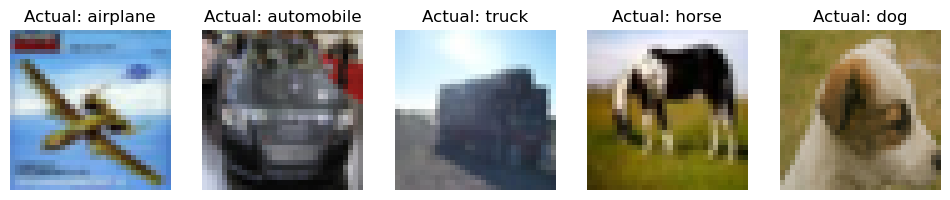

In [4]:
# Let's look at some sample images with their labels
# Run the helper code below to plot the image and its label
num_images = 5
fig, ax = plt.subplots(1,num_images,figsize=(12,12))
for i in range(num_images):
    image_index = random.randint(0,1000)
    img = (x_test[image_index]+0.5)
    # +0.5 for all channels to make it in the range of [0,1]
    ax[i].imshow(img)
    label = cifar10dict[np.argmax(y_test[image_index])]
    ax[i].set_title(f'Actual: {label}')
    ax[i].axis('off')

In [5]:
# For this exercise we use a pre-trained network by calling
# the cnn_model() function
model = cnn_model()
model.summary()

2023-07-19 21:37:16.140710: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                        

In [6]:
# Evaluate the pretrained model on the test set
model_score = model.evaluate(x_test,y_test)
print(f'The test set accuracy for the pre-trained model is {100*model_score[1]:.2f} %')

32/32 [==============================] - 1s 16ms/step - loss: 0.6972 - accuracy: 0.7660
The test set accuracy for the pre-trained model is 76.60 %


In [10]:
x_test[2:3]
# same dimension as x_test
# !!!!!!!!!!!

array([[[[ 0.2372549 ,  0.28431373,  0.28039216],
         [ 0.27254902,  0.30784314,  0.3       ],
         [ 0.11176471,  0.13529412,  0.18627451],
         ...,
         [-0.02156863,  0.10784314,  0.21764706],
         [-0.0372549 ,  0.09215686,  0.20588235],
         [-0.0372549 ,  0.08823529,  0.20588235]],

        [[ 0.16666667,  0.21764706,  0.22156863],
         [ 0.21372549,  0.26078431,  0.26078431],
         [ 0.25294118,  0.30392157,  0.30784314],
         ...,
         [-0.00588235,  0.11960784,  0.24117647],
         [-0.01372549,  0.11568627,  0.2372549 ],
         [-0.00196078,  0.13137255,  0.24509804]],

        [[ 0.0254902 ,  0.09215686,  0.07254902],
         [ 0.11960784,  0.1745098 ,  0.17058824],
         [ 0.22156863,  0.28431373,  0.29215686],
         ...,
         [ 0.00980392,  0.13137255,  0.24901961],
         [ 0.00980392,  0.13921569,  0.25294118],
         [ 0.03333333,  0.15882353,  0.26862745]],

        ...,

        [[ 0.11176471,  0.20588235,  0

In [9]:
x_test[2]
# different dimensions
# !!!!!!!!!!!1

array([[[ 0.2372549 ,  0.28431373,  0.28039216],
        [ 0.27254902,  0.30784314,  0.3       ],
        [ 0.11176471,  0.13529412,  0.18627451],
        ...,
        [-0.02156863,  0.10784314,  0.21764706],
        [-0.0372549 ,  0.09215686,  0.20588235],
        [-0.0372549 ,  0.08823529,  0.20588235]],

       [[ 0.16666667,  0.21764706,  0.22156863],
        [ 0.21372549,  0.26078431,  0.26078431],
        [ 0.25294118,  0.30392157,  0.30784314],
        ...,
        [-0.00588235,  0.11960784,  0.24117647],
        [-0.01372549,  0.11568627,  0.2372549 ],
        [-0.00196078,  0.13137255,  0.24509804]],

       [[ 0.0254902 ,  0.09215686,  0.07254902],
        [ 0.11960784,  0.1745098 ,  0.17058824],
        [ 0.22156863,  0.28431373,  0.29215686],
        ...,
        [ 0.00980392,  0.13137255,  0.24901961],
        [ 0.00980392,  0.13921569,  0.25294118],
        [ 0.03333333,  0.15882353,  0.26862745]],

       ...,

       [[ 0.11176471,  0.20588235,  0.29215686],
        [ 0

In [8]:
model.predict(x_test[2:3])

1/1 [==============================] - 0s 50ms/step


array([[1.1198634e-03, 5.0442588e-05, 1.0623595e-02, 1.6489290e-01,
        7.9109743e-02, 3.3543822e-01, 3.0491601e-03, 4.0475288e-01,
        3.0118017e-04, 6.6202751e-04]], dtype=float32)

In [16]:

# By default, the index is into the flattened array, otherwise along the specified axis.
print(np.argmax(model.predict(x_test[2:3])))
np.argmax(model.predict(x_test[2:3]), axis=1)

1/1 [==============================] - 0s 13ms/step
7
1/1 [==============================] - 0s 25ms/step


array([7])

1/1 [==============================] - 0s 38ms/step


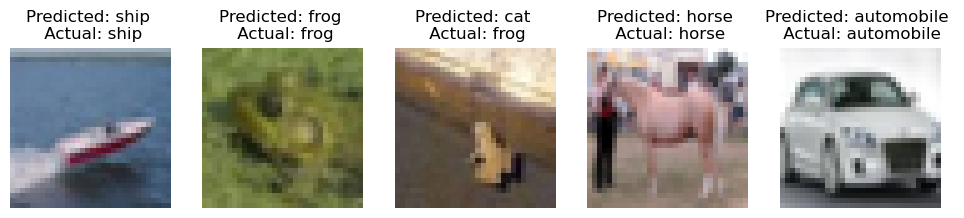

In [16]:
# Visualizing the predictions on 5 randomly selected images
num_images = 5
fig, ax = plt.subplots(1,num_images,figsize=(12,12))
for i in range(num_images):
    image_index = random.randint(0,1000)
    prediction= cifar10dict[int(np.squeeze(np.argmax(model.predict(x_test[image_index:image_index+1]),axis=1),axis=0))]
    img = (x_test[image_index] + 0.5)
    ax[i].imshow(img)
    ax[i].set_title(f'Predicted: {prediction} \n Actual: {cifar10dict[np.argmax(y_test[image_index:image_index+1])]}')
    ax[i].axis('off')

## Visualize kernels corresponding to the filters for the 1st layer


In [21]:
# The 'weights' variable is of the form 
# [height, width, channel, number of filters]

# Use .get_weights() with the appropriate layer number 
# to get the weights and bias of the first layer i.e. layer number 0
weights, bias= model.layers[0].get_weights()

assert weights.shape == (3,3,3,32), "Computed weights are incorrect"

In [28]:
weights

array([[[[ 4.92802495e-03, -1.14653803e-01, -6.49309764e-03,
          -7.15768263e-02,  1.00143082e-01,  1.08412176e-01,
          -5.64938933e-02,  1.13908440e-01, -4.38938662e-02,
           8.90771449e-02, -4.83386591e-02, -8.90744478e-02,
           1.94854625e-02, -4.48851287e-02, -1.02640934e-01,
           2.74361465e-02, -1.10872567e-01, -1.06090114e-01,
           8.01243819e-03,  1.87001571e-01,  1.81324080e-01,
           3.95629518e-02,  1.51843742e-01,  1.39152572e-01,
           5.01513295e-03, -1.30896531e-02, -1.54555902e-01,
           1.29916847e-01,  6.27992004e-02, -1.09530352e-01,
           1.05307788e-01,  5.19491695e-02],
         [ 3.60148102e-02, -1.05249181e-01, -1.15934744e-01,
           1.36902854e-01, -2.02591028e-02,  1.48522973e-01,
           1.59233019e-01,  2.19196573e-01,  4.89607975e-02,
           1.24607021e-02,  9.88655090e-02,  5.33555895e-02,
           7.16472929e-03,  4.00429294e-02,  4.81839590e-02,
           7.11424500e-02,  7.40377186e-

In [22]:
# How many filters are in the first convolution layer?
n_filters = weights.shape[3]
print(f'Number of filters: {n_filters}')

# Print the filter size
filter_channel = weights.shape[2]
filter_height = weights.shape[0]
filter_width = weights.shape[1]
print(f'Number of channels {filter_channel}')
print(f'Filter height {filter_height}')
print(f'Filter width {filter_width}')


Number of filters: 32
Number of channels 3
Filter height 3
Filter width 3


### ⏸ Based on the dimensions of the input image given to the defined model, how many kernels constitute the first filter?


#### A. $3$
#### B. $32$
#### C. $1$
#### D. $24$

In [ ]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option C, put 'C')
answer1 = 'A'

In [42]:
# The 'weights' variable (defined above) is of the form 
# [height, width, channel, number of filters]
# From this select all three channels, the entire length and width
# and the first filter
kernels_filter1 = weights[:,:,:,0].transpose((2,0,1))
kernels_filter2 = weights[:,:,:,0]

# Test case to check if you have indexed correctly
assert kernels_filter1.shape == (3,3,3)

In [38]:
kernels_filter1

array([[[ 0.00492802,  0.09188671, -0.16271073],
        [ 0.03514322,  0.05419802,  0.07528418],
        [-0.06083495, -0.11633755,  0.11160117]],

       [[ 0.03601481,  0.16896315, -0.05720915],
        [-0.03820654,  0.15841235, -0.11607458],
        [ 0.09310057,  0.12431379,  0.12823805]],

       [[-0.06720798,  0.09917763, -0.15853295],
        [-0.04697072, -0.14620736,  0.03580641],
        [-0.07815446, -0.05015893, -0.14561349]]], dtype=float32)

In [39]:
kernels_filter1[0]

array([[ 0.00492802,  0.09188671, -0.16271073],
       [ 0.03514322,  0.05419802,  0.07528418],
       [-0.06083495, -0.11633755,  0.11160117]], dtype=float32)

In [40]:
kernels_filter1[:,:,0]

array([[ 0.00492802,  0.03514322, -0.06083495],
       [ 0.03601481, -0.03820654,  0.09310057],
       [-0.06720798, -0.04697072, -0.07815446]], dtype=float32)

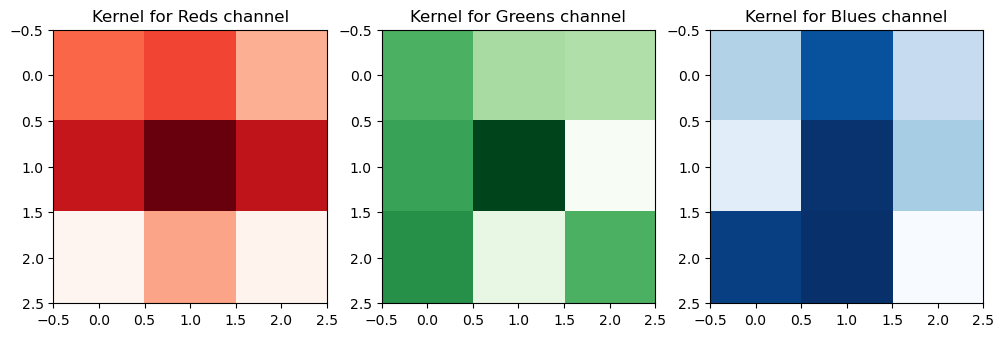

In [43]:
# Use the helper code below to plot each kernel of the choosen filter 
fig, axes = plt.subplots(1,3,figsize = (12,4))
colors = ['Reds','Greens','Blues']
for num, i in enumerate(axes):
  i.imshow(kernels_filter2[num],cmap=colors[num])
  # i.imshow(kernels_filter2[:,:,num],cmap=colors[num])
  i.set_title(f'Kernel for {colors[num]} channel')

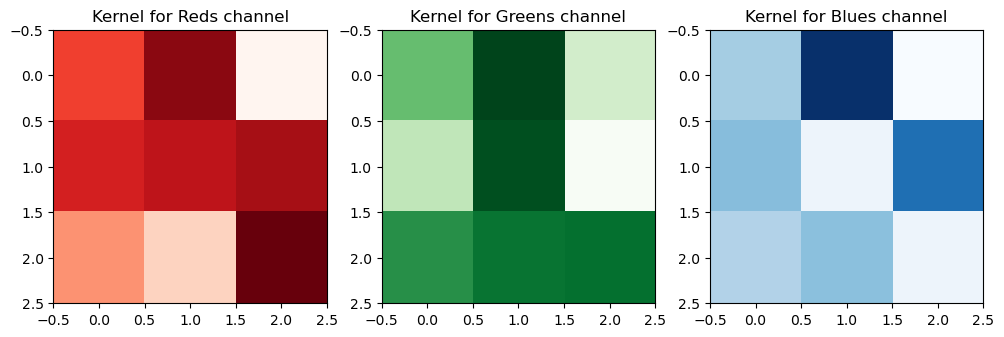

In [44]:
# Use the helper code below to plot each kernel of the choosen filter 
fig, axes = plt.subplots(1,3,figsize = (12,4))
colors = ['Reds','Greens','Blues']
for num, i in enumerate(axes):
  i.imshow(kernels_filter1[num],cmap=colors[num])
  i.set_title(f'Kernel for {colors[num]} channel')
  

## Visualizing one *filter* for the first convolutional layer

Each of the above *kernels* stacked together forms a filter, which interacts with the input.

Text(0.5, 1.0, '1st Filter of convolution')

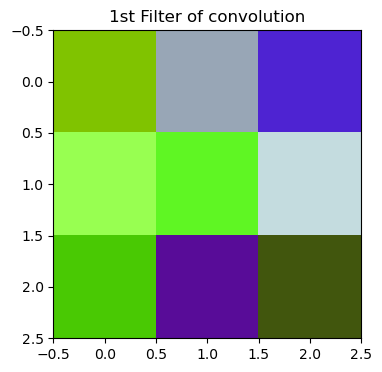

In [47]:
# For the same filter above, we perform normalization because the current
# values are between -1 and 1 and the imshow function would truncate all values 
# less than 0 making the visual difficult to infer from.
kernels_filter1 = (kernels_filter1 - kernels_filter1.min())/(kernels_filter1.max() - kernels_filter1.min())

# Plotting the filter
fig, ax = plt.subplots(1,1,figsize = (4,4))
ax.imshow(kernels_filter1)
ax.set_title(f'1st Filter of convolution')

## Visualizing all the filters (32) for the first convolutional layer

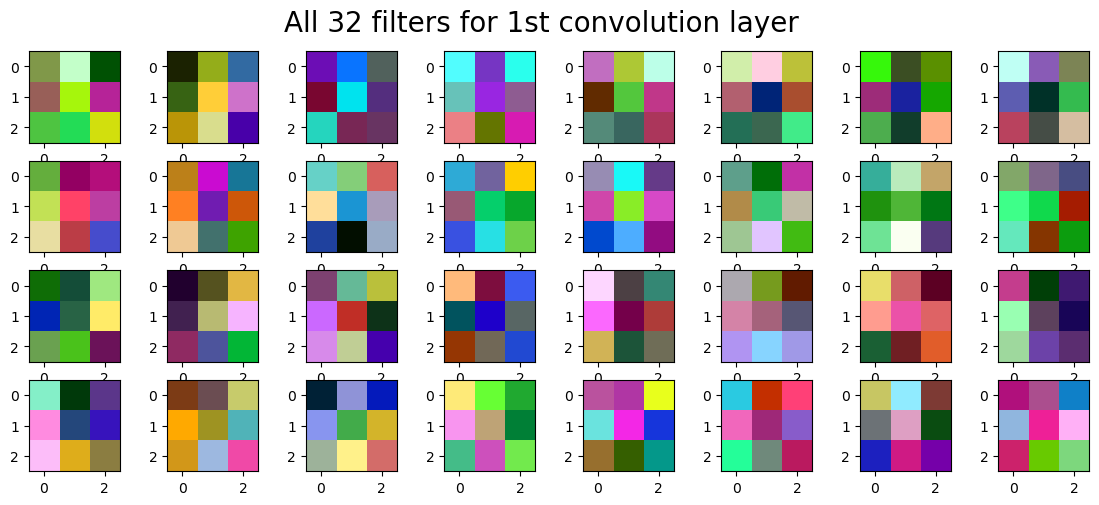

In [27]:
# Use the helper code below to visualize all filters for the first layer

fig,ax=plt.subplots(4,8,figsize=(14,14))
fig.subplots_adjust(bottom=0.2,top=0.5)
for i in range(4):
    for j in range(8):
        filters= weights[:,:,:,(8*i)+j]
        filters = (filters - filters.min())/(filters.max() - filters.min())
        ax[i,j].imshow(filters)
        
fig.suptitle('All 32 filters for 1st convolution layer',fontsize=20, y=0.53);     

## Visualize Feature Maps & Activations


### ⏸ Which of the following statements is true?


#### A. Feature maps are a collection of weights, and filters are outputs of convolved inputs. 
#### B. Filters are a collection of learned weights, and feature maps are outputs of convolved inputs.
#### C. Feature maps are learned features of a trained CNN model.
#### D. Filters are the outputs of an activation layer on a feature map.

In [ ]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option C, put 'C')
answer2 = 'B C'

In [48]:
# Use model.layers to get a list of all the layers in the model
layers_list = model.layers
print('\n'.join([layer.name for layer in layers_list]))
# !!!!!!!!!!!

conv2d
activation
conv2d_1
activation_1
max_pooling2d
conv2d_2
activation_2
conv2d_3
activation_3
max_pooling2d_1
flatten
dense
activation_4
dense_1
activation_5


For this exercise, we take a look at only the first convolution layer and the first activation layer.

In [49]:
# Get the output of the first convolution layer
layer0_output = model.layers[0].output


In [51]:
# Use the tf.keras functional API : Model(inputs= , outputs = ) where
# the input will come from model.input and output will be layer0_output
feature_model = Model(inputs = model.input, outputs= layer0_output)
# A model grouping layers into an object with training/inference features.
# allows you to create, train, and use deep learning models easily. It is a base class for defining and building custom neural network models in TensorFlow.

# Use a sample image from the test set to visualize the feature maps
img = x_test[16].reshape(1,32,32,3)
# !!!!!!!!!!

# NOTE: We have to reshape the image to 4-d tensor so that
# it can input to the trained model

GridSpec(4, 4)[1:3, 1:3]

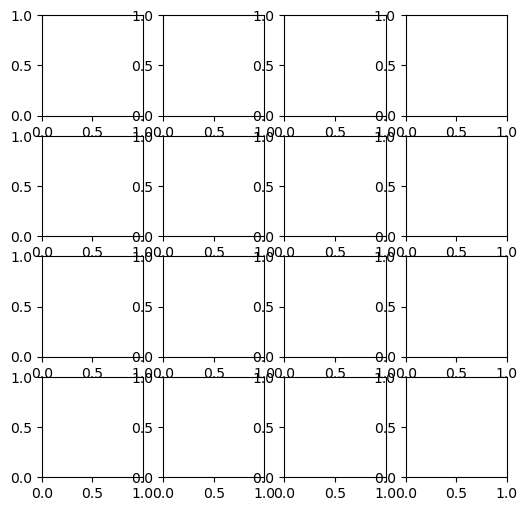

In [65]:
fig, axs = plt.subplots(ncols=4, nrows=4,figsize = (6,6))
# gs = axs[0, 0].get_gridspec()
gs = axs[1, 1].get_gridspec()
# gs = axs[2, 2].get_gridspec()
gs
gs[1:-1, 1:-1]
# always 1:3 rows and columns in the original fig


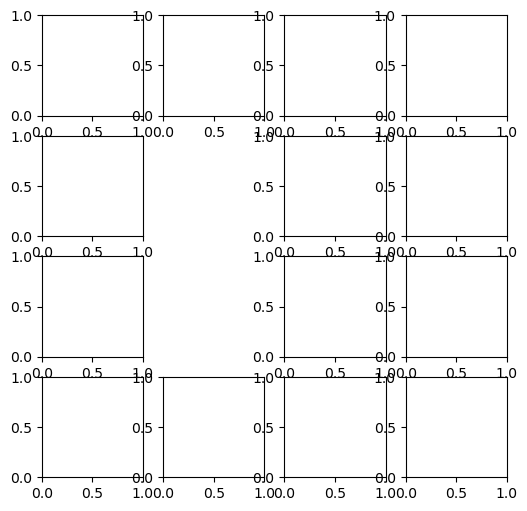

In [66]:
fig, axs = plt.subplots(ncols=4, nrows=4,figsize = (6,6))

for ax in axs[1:-1, 1:-1]:
    ax[0].remove()
    # ax[1].remove()



1/1 [==============================] - 0s 39ms/step


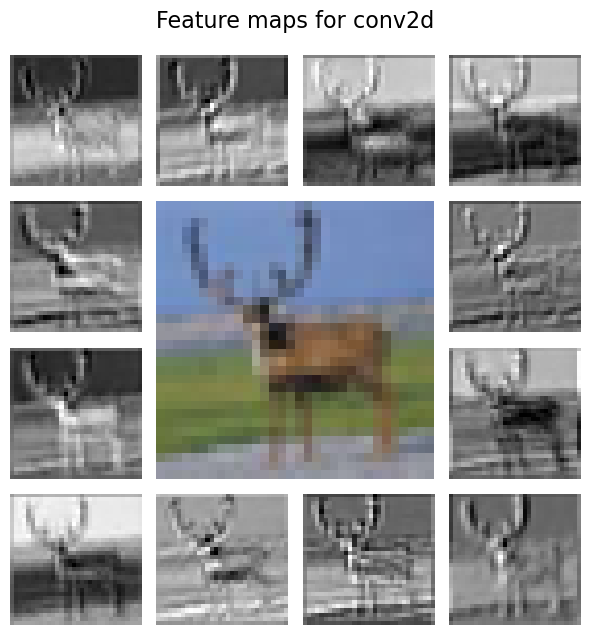

In [52]:
# Use the helper code below to plot the feature maps
features = feature_model.predict(img)
plot_featuremaps(img,features,[model.layers[0].name])

In [68]:
features.shape

(1, 32, 32, 32)

# Visualizing the first activation

In [69]:
# Get the output of the first activation layer
layer1_output = model.layers[1].output

In [70]:
# Follow the same steps as above for the next layer
activation_model = Model(inputs = model.input, outputs = layer1_output)


1/1 [==============================] - 0s 33ms/step


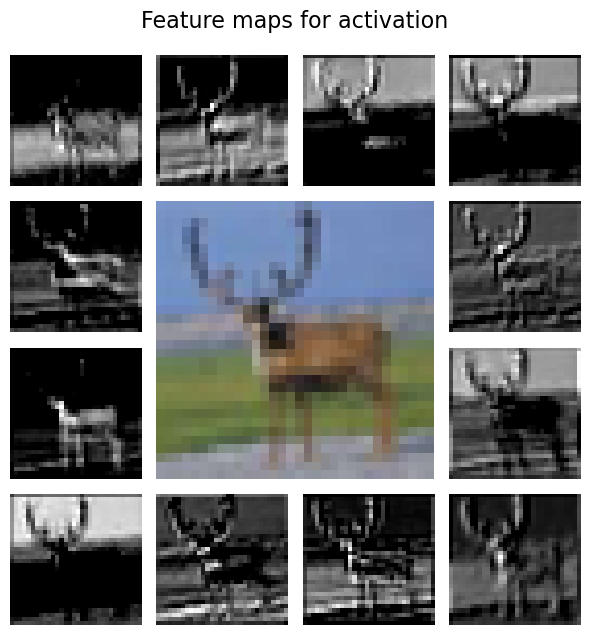

In [71]:
# Use the helper code to again visualize the outputs
img = x_test[16].reshape(1,32,32,3)
activations = activation_model.predict(img)

# You can download the plot_featuremaps helper file
# to see how exactly do we make this nice plot below
plot_featuremaps(img,activations,[model.layers[1].name])

### ⏸ Using the feature maps, is it possible to locate the part of the image that is most responsible for predicting the output class?
#### A. Yes
#### B. No

In [ ]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below 
# (eg. if you choose option B, put 'B')
answer3 = '___'